<a href="https://colab.research.google.com/github/buriro-ezekia/Data-Science-Project-Portfolios/blob/main/Phase_2_Campaign_Optimization_and_Strategy_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Bidding Strategy Development

In [12]:
# Step 1: Load and Inspect Data

import pandas as pd

# Load the data
df = pd.read_csv('/content/Apple Search Ads Campaigns Cleaned_Dataset.csv')

# Inspect the first few rows
print(df.head())



   campaign_id                                  campaign_name  start_date  \
0  470311161.0                         0.54 - May 2022 - Arab  31/08/2020   
1  481689442.0                   0.54 - Tier 1 & 2 - May 2022  04/10/2020   
2  469927825.0                       0.54 - Tier 1 - May 2022  29/08/2020   
3  474269632.0                             1.00 - My Keywords  14/09/2020   
4  484006307.0  1.01 - US/OZ - May 2022 - Performing Keywords  12/10/2020   

   status                    app_name              ad_placement  \
0  paused  Sleep Habits: Sleep Better  App Store Search Results   
1  paused  Sleep Habits: Sleep Better  App Store Search Results   
2  paused  Sleep Habits: Sleep Better  App Store Search Results   
3  paused  Sleep Habits: Sleep Better  App Store Search Results   
4  paused  Sleep Habits: Sleep Better  App Store Search Results   

   lifetime_budget  daily_budget   spend  average_cost_per_tap_(cpt)  ...  \
0           5000.0         500.0  103.98                 

In [13]:
# Display data summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   campaign_id                                  13 non-null     float64
 1   campaign_name                                13 non-null     object 
 2   start_date                                   13 non-null     object 
 3   status                                       13 non-null     object 
 4   app_name                                     13 non-null     object 
 5   ad_placement                                 13 non-null     object 
 6   lifetime_budget                              10 non-null     float64
 7   daily_budget                                 13 non-null     float64
 8   spend                                        14 non-null     float64
 9   average_cost_per_tap_(cpt)                   14 non-null     float64
 10  aver

In [28]:
# Print rows with NaN in 'campaign_name'
print("Rows with NaN in 'campaign_name':")
print(df[df['campaign_name'].isna()])

# Option 1: Fill NaN with a placeholder value (e.g., 'Unknown Campaign')
df['campaign_name'].fillna('Unknown Campaign', inplace=True)

# Option 2: Drop rows with NaN values in 'campaign_name'
# df = df.dropna(subset=['campaign_name'])

Rows with NaN in 'campaign_name':
    campaign_id campaign_name start_date status app_name ad_placement  \
13          NaN           NaN        NaN    NaN      NaN          NaN   

    lifetime_budget  daily_budget    spend  average_cost_per_tap_(cpt)  ...  \
13              NaN           NaN  1523.76                        0.12  ...   

    average_cost_per_thousand-impressions_(cpm)  impressions   taps  installs  \
13                                         2.73       558746  13236      3137   

    the_tap-through_rate_(ttr)  conversion_rate_(cr)  lat_on_installs  \
13                        0.02                  0.24              289   

    lat_off_installs  new_downloads  redownloads  
13              1330           3113           24  

[1 rows x 21 columns]


In [29]:
# Verify changes
print("\nData after handling NaN values:")
print(df.head(5))


Data after handling NaN values:
   campaign_id                                  campaign_name  start_date  \
0  470311161.0                         0.54 - May 2022 - Arab  31/08/2020   
1  481689442.0                   0.54 - Tier 1 & 2 - May 2022  04/10/2020   
2  469927825.0                       0.54 - Tier 1 - May 2022  29/08/2020   
3  474269632.0                             1.00 - My Keywords  14/09/2020   
4  484006307.0  1.01 - US/OZ - May 2022 - Performing Keywords  12/10/2020   

   status                    app_name              ad_placement  \
0  paused  Sleep Habits: Sleep Better  App Store Search Results   
1  paused  Sleep Habits: Sleep Better  App Store Search Results   
2  paused  Sleep Habits: Sleep Better  App Store Search Results   
3  paused  Sleep Habits: Sleep Better  App Store Search Results   
4  paused  Sleep Habits: Sleep Better  App Store Search Results   

   lifetime_budget  daily_budget   spend  average_cost_per_tap_(cpt)  ...  \
0           5000.0      

In [44]:
import pandas as pd

# Load the DataFrame from the CSV file
df = pd.read_csv('/content/Apple Search Ads Campaigns Cleaned_Dataset.csv')

# Drop rows where all specified columns have NaN values
columns_to_check = [
    'campaign_id',
    'start_date',
    'status',
    'app_name',
    'ad_placement',
    'lifetime_budget',
    'daily_budget',
    'spend',
    'average_cost_per_tap_(cpt)'
]

df = df.dropna(subset=columns_to_check, how='all')

# Display the cleaned DataFrame
print(df)


     campaign_id                                  campaign_name  start_date  \
0   4.703112e+08                         0.54 - May 2022 - Arab  31/08/2020   
1   4.816894e+08                   0.54 - Tier 1 & 2 - May 2022  04/10/2020   
2   4.699278e+08                       0.54 - Tier 1 - May 2022  29/08/2020   
3   4.742696e+08                             1.00 - My Keywords  14/09/2020   
4   4.840063e+08  1.01 - US/OZ - May 2022 - Performing Keywords  12/10/2020   
5   4.870115e+08                          1.50 - May 2022 - USA  18/10/2020   
6   5.798608e+08          1.50 - USA - May 2022 - Apple Suggest  03/07/2021   
7   4.814068e+08                            Japan Oct 2020 0.19  04/10/2020   
8   1.454603e+09                  Sleep - Exploration Sept 2023  16/09/2023   
9   1.153490e+09                   Sleep Habits - Product pages  28/09/2022   
10  1.153493e+09                        Sleep Habits Todays Tab  28/09/2022   
11  4.698193e+08                         Sleep Habit

In [40]:
# Step 2: Calculate Key Metrics
# Calculate Metrics for Keywords and User Segments

# Calculate average CPA and ROAS for each campaign
avg_cpa_by_campaign = df.groupby('campaign_name')['average_cost_per_acquisition_(cpa)'].mean().reset_index()
avg_roas_by_campaign = df.groupby('campaign_name')['spend'].sum().reset_index()

# For ROAS calculation, we need revenue. Assuming spend as a proxy for revenue for simplicity
df['revenue'] = df['spend'] * df['conversion_rate_(cr)']  # Example revenue calculation
df['roas'] = df['revenue'] / df['spend']

# Calculate ROAS
avg_roas_by_campaign = df.groupby('campaign_name')['roas'].mean().reset_index()

# Display the calculated metrics
print("Average CPA by Campaign:")
print(avg_cpa_by_campaign)
print("\nAverage ROAS by Campaign:")
print(avg_roas_by_campaign)


Average CPA by Campaign:
                                    campaign_name  \
0                          0.54 - May 2022 - Arab   
1                    0.54 - Tier 1 & 2 - May 2022   
2                        0.54 - Tier 1 - May 2022   
3                              1.00 - My Keywords   
4   1.01 - US/OZ - May 2022 - Performing Keywords   
5                           1.50 - May 2022 - USA   
6           1.50 - USA - May 2022 - Apple Suggest   
7                             Japan Oct 2020 0.19   
8                   Sleep - Exploration Sept 2023   
9                    Sleep Habits - Product pages   
10                        Sleep Habits Todays Tab   
11                         Sleep Habits WW Launch   
12                                 Top Tier Sleep   

    average_cost_per_acquisition_(cpa)  
0                                 0.16  
1                                 0.48  
2                                 0.41  
3                                 0.32  
4                          

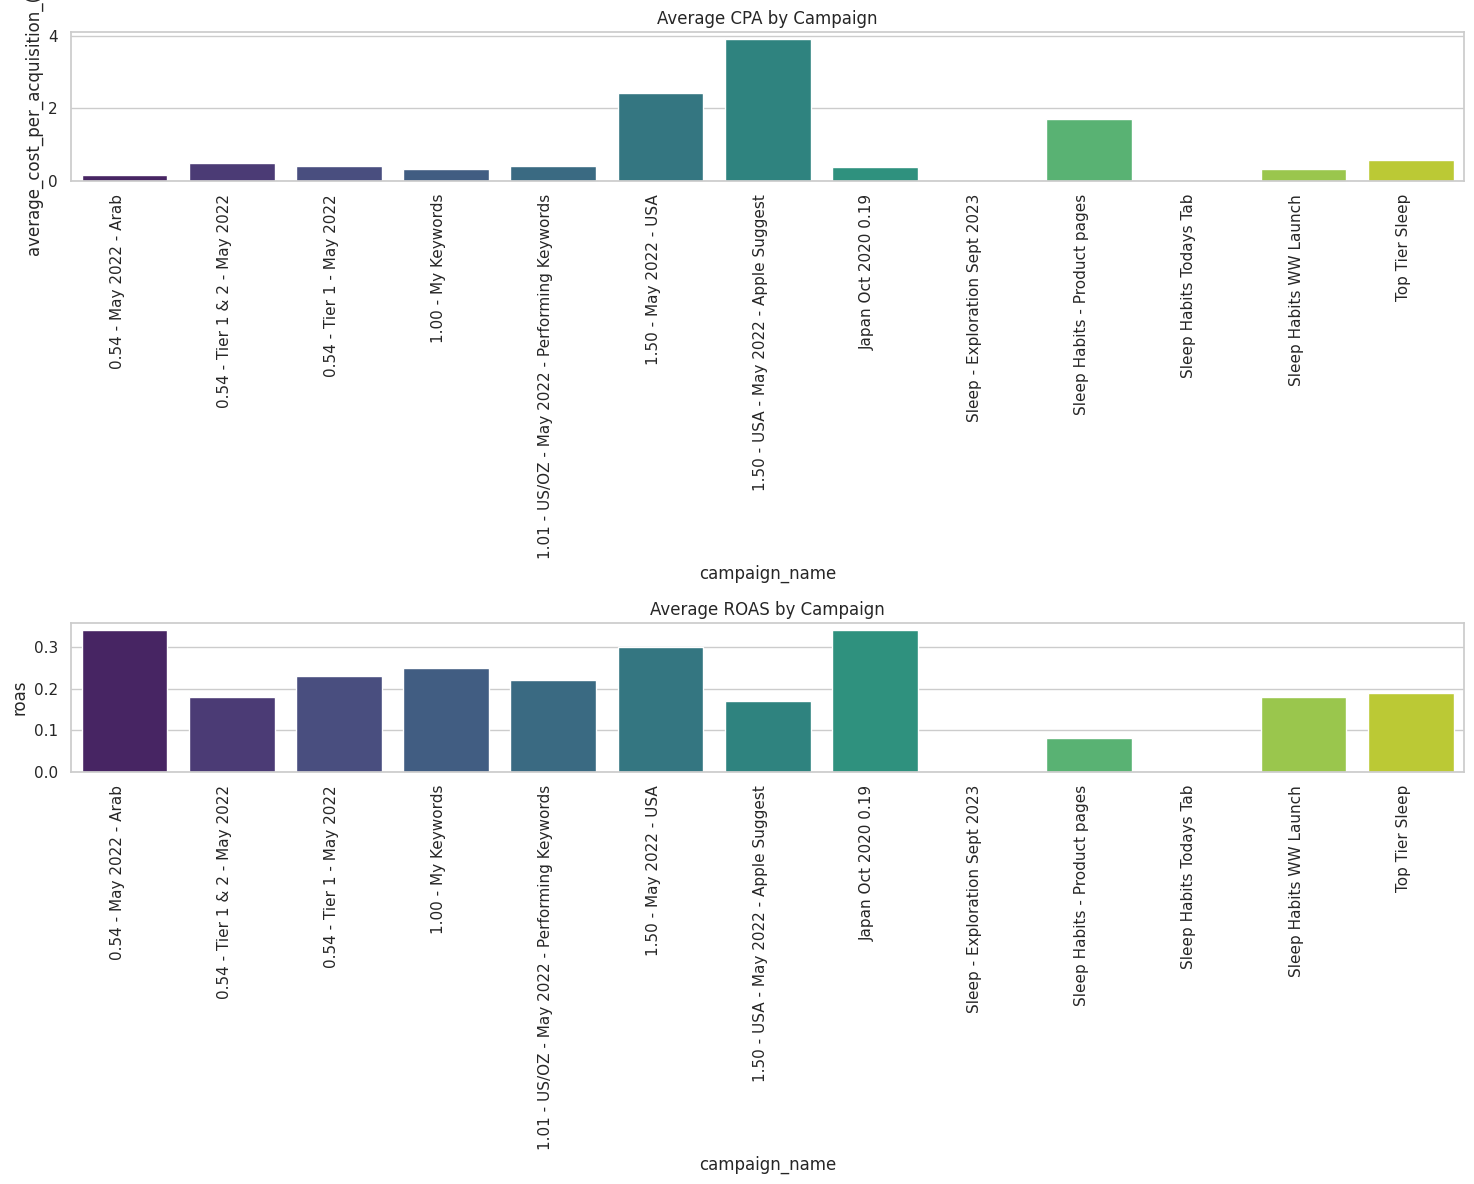

In [32]:
# Step 3: Segment Analysis
# Use visualizations to compare performance across different campaigns and keywords
# Create Visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set the plot style
sns.set(style="whitegrid")

# Create subplots for CPA and ROAS by campaign
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# CPA by Campaign
sns.barplot(x='campaign_name', y='average_cost_per_acquisition_(cpa)', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Average CPA by Campaign')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# ROAS by Campaign
sns.barplot(x='campaign_name', y='roas', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Average ROAS by Campaign')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()
plt.show()



# Step 4: Develop Recommendations
Based on the analysis, we can develop recommendations to optimize bidding strategies;

1. Increase Bids for High-Performing Keywords and Campaigns
- Campaigns with high ROAS should receive higher bids to capture more traffic.
- For example, increase bids for campaigns with ROAS greater than 2.5.
2. Adjust Bids for Underperforming Keywords and Campaigns

- Campaigns with low ROAS and high CPA should have their bids adjusted.
- For example, reduce bids for campaigns with ROAS less than 1.5.
3. Implement Location-Based Bidding Adjustments

- If data includes location information (sure, it has), analyze performance by region.
- Increase bids in regions with higher performance and lower CPA.
4. Segment-Based Adjustments

- Focus on user segments with high ROAS and low CPA.
- For example, increase bids for user segments that show high conversion rates.

In [18]:
# Apply Bid Adjustments

# Example bid adjustment logic based on ROAS
def adjust_bids(row):
    if row['roas'] > 2.5:
        return 'Increase Bid'
    elif row['roas'] < 1.5:
        return 'Decrease Bid'
    else:
        return 'Maintain Bid'

# Apply bid adjustments
df['bid_adjustment'] = df.apply(adjust_bids, axis=1)

# Display the recommended bid adjustments
print(df[['campaign_name', 'roas', 'bid_adjustment']])


                                    campaign_name  roas bid_adjustment
0                          0.54 - May 2022 - Arab  0.34   Decrease Bid
1                    0.54 - Tier 1 & 2 - May 2022  0.18   Decrease Bid
2                        0.54 - Tier 1 - May 2022  0.23   Decrease Bid
3                              1.00 - My Keywords  0.25   Decrease Bid
4   1.01 - US/OZ - May 2022 - Performing Keywords  0.22   Decrease Bid
5                           1.50 - May 2022 - USA  0.30   Decrease Bid
6           1.50 - USA - May 2022 - Apple Suggest  0.17   Decrease Bid
7                             Japan Oct 2020 0.19  0.34   Decrease Bid
8                   Sleep - Exploration Sept 2023  0.00   Decrease Bid
9                    Sleep Habits - Product pages  0.08   Decrease Bid
10                        Sleep Habits Todays Tab   NaN   Maintain Bid
11                         Sleep Habits WW Launch  0.18   Decrease Bid
12                                 Top Tier Sleep  0.19   Decrease Bid
13    

# Step 5: Implement and Monitor Strategies
Implement these bidding strategies in your ad campaigns and continuously monitor their performance. Adjust the strategies as necessary based on ongoing data analysis.

# Continuous Monitoring and Reporting
- **Set Up Automated Reporting**: Use automated tools to track performance changes over time.
- **Regularly Review Metrics**: Adjust bids as necessary to maintain or improve ROAS.
- **Use Dashboards**: For real-time monitoring and quick decision-making.

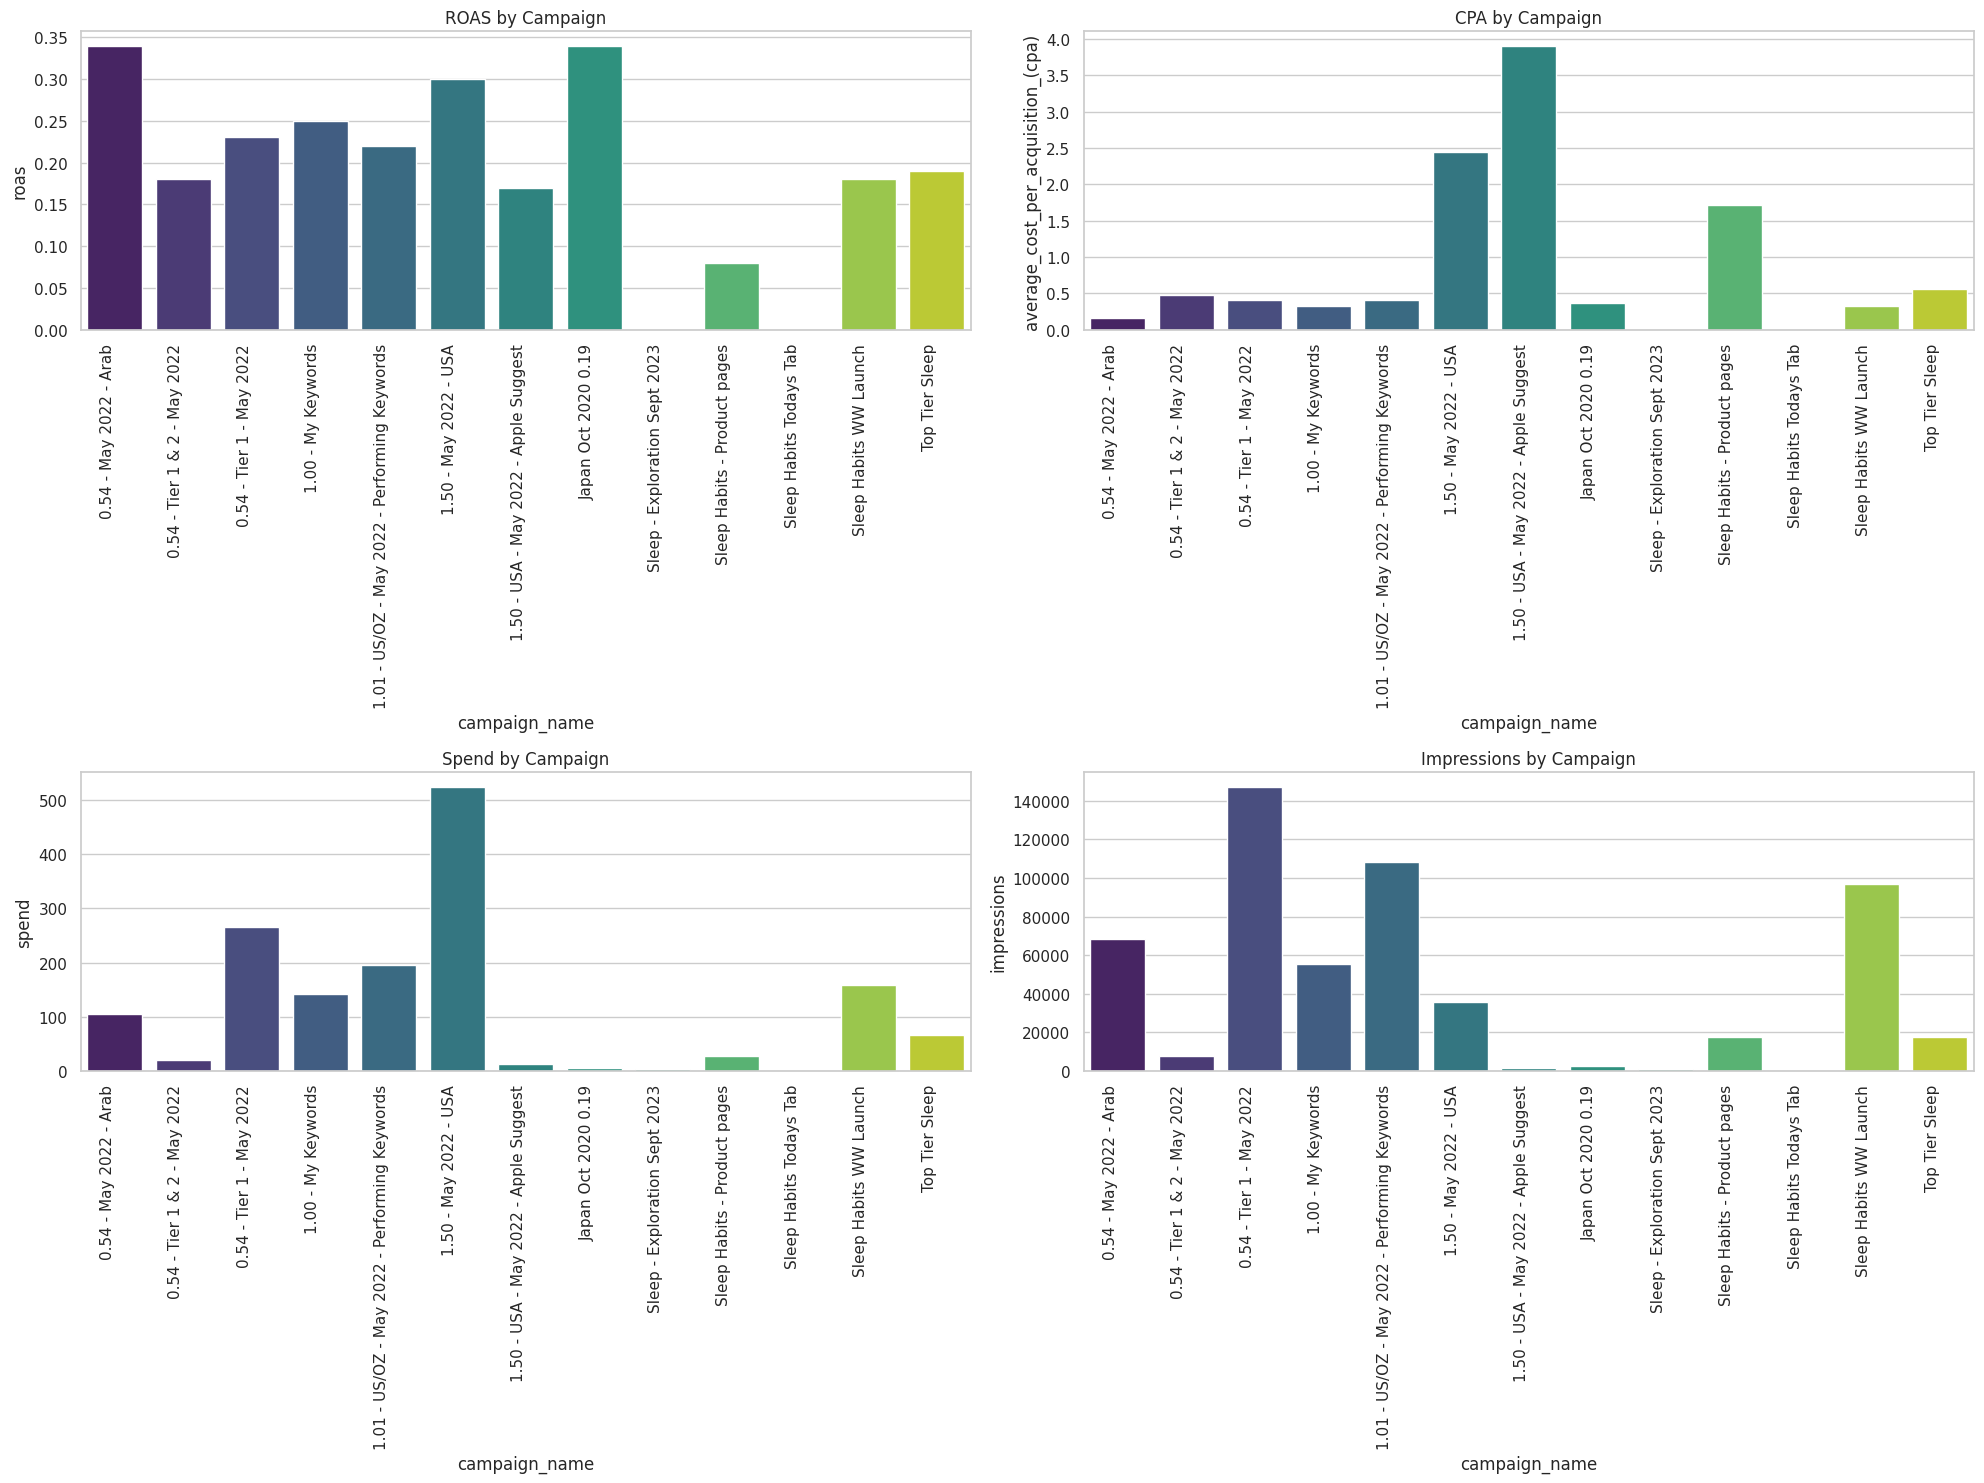

In [38]:
# Dashboard Creation  Example
# Create a dashboard to visualize key performance indicators (KPIs) for easy monitoring

# Dashboard Creation  Example
# Create a dashboard to visualize key performance indicators (KPIs) for easy monitoring
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is a DataFrame containing 'roas' column (make sure it's calculated and in scope)

# For ROAS calculation, we need revenue. Assuming spend as a proxy for revenue for simplicity
df['revenue'] = df['spend'] * df['conversion_rate_(cr)']  # Example revenue calculation
df['roas'] = df['revenue'] / df['spend']

# Set the plot style
sns.set(style="whitegrid")
# Example of creating a simple dashboard using matplotlib
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot ROAS by Campaign
sns.barplot(x='campaign_name', y='roas', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('ROAS by Campaign')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90, ha='right')

# Plot CPA by Campaign
sns.barplot(x='campaign_name', y='average_cost_per_acquisition_(cpa)', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('CPA by Campaign')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90, ha='right')

# Plot Spend by Campaign
sns.barplot(x='campaign_name', y='spend', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Spend by Campaign')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90, ha='right')

# Plot Impressions by Campaign
sns.barplot(x='campaign_name', y='impressions', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Impressions by Campaign')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()
plt.show()


# Task 3: Campaign Structure Recommendations

In [42]:
# Step 1: EDA of the Current Campaign Structure
# Load and Inspect Data

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Apple Search Ads Campaigns Cleaned_Dataset.csv')

# Display basic information
# print(df.info())
print(df.describe())
# print(df.head())


        campaign_id  lifetime_budget  daily_budget        spend  \
count  1.300000e+01        10.000000     13.000000    14.000000   
mean   6.638850e+08      5400.000000    453.846154   217.680714   
std    3.449535e+08      3687.817783    281.707249   402.388145   
min    4.698193e+08      1000.000000    100.000000     0.000000   
25%    4.706172e+08      2000.000000    300.000000    13.830000   
50%    4.816894e+08      5000.000000    500.000000    84.905000   
75%    5.798608e+08      9000.000000    500.000000   186.475000   
max    1.454603e+09     10000.000000   1000.000000  1523.760000   

       average_cost_per_tap_(cpt)  average_cost_per_acquisition_(cpa)  \
count                   14.000000                           14.000000   
mean                     0.202143                            0.827143   
std                      0.235868                            1.112000   
min                      0.000000                            0.000000   
25%                      0.0825

In [47]:
# Drop rows where all specified columns have NaN values
columns_to_check = [
    'campaign_id',
    'start_date',
    'status',
    'app_name',
    'ad_placement',
    'lifetime_budget',
    'daily_budget',
    'spend',
    'average_cost_per_tap_(cpt)'
]

df = df.dropna(subset=columns_to_check, how='all')

# Display the cleaned DataFrame
print(df)

     campaign_id                                  campaign_name  start_date  \
0   4.703112e+08                         0.54 - May 2022 - Arab  31/08/2020   
1   4.816894e+08                   0.54 - Tier 1 & 2 - May 2022  04/10/2020   
2   4.699278e+08                       0.54 - Tier 1 - May 2022  29/08/2020   
3   4.742696e+08                             1.00 - My Keywords  14/09/2020   
4   4.840063e+08  1.01 - US/OZ - May 2022 - Performing Keywords  12/10/2020   
5   4.870115e+08                          1.50 - May 2022 - USA  18/10/2020   
6   5.798608e+08          1.50 - USA - May 2022 - Apple Suggest  03/07/2021   
7   4.814068e+08                            Japan Oct 2020 0.19  04/10/2020   
8   1.454603e+09                  Sleep - Exploration Sept 2023  16/09/2023   
9   1.153490e+09                   Sleep Habits - Product pages  28/09/2022   
10  1.153493e+09                        Sleep Habits Todays Tab  28/09/2022   
11  4.698193e+08                         Sleep Habit

In [48]:
# Check unique values in key columns
print("Unique campaigns:", df['campaign_name'].nunique())
print("Unique ad placements:", df['ad_placement'].unique())
print("Unique statuses:", df['status'].unique())

Unique campaigns: 13
Unique ad placements: ['App Store Search Results' 'Product Pages?While Browsing' 'Today Tab' nan]
Unique statuses: ['paused' nan]


In [50]:
# Summary statistics for numerical columns
print(df.describe())



        campaign_id  lifetime_budget  daily_budget        spend  \
count  1.300000e+01        10.000000     13.000000    14.000000   
mean   6.638850e+08      5400.000000    453.846154   217.680714   
std    3.449535e+08      3687.817783    281.707249   402.388145   
min    4.698193e+08      1000.000000    100.000000     0.000000   
25%    4.706172e+08      2000.000000    300.000000    13.830000   
50%    4.816894e+08      5000.000000    500.000000    84.905000   
75%    5.798608e+08      9000.000000    500.000000   186.475000   
max    1.454603e+09     10000.000000   1000.000000  1523.760000   

       average_cost_per_tap_(cpt)  average_cost_per_acquisition_(cpa)  \
count                   14.000000                           14.000000   
mean                     0.202143                            0.827143   
std                      0.235868                            1.112000   
min                      0.000000                            0.000000   
25%                      0.0825

In [51]:
# Summary statistics for categorical columns
print(df.describe(include=['object']))

                 campaign_name  start_date  status  \
count                       13          13      13   
unique                      13          10       1   
top     0.54 - May 2022 - Arab  04/10/2020  paused   
freq                         1           2      13   

                          app_name              ad_placement  
count                           13                        13  
unique                           1                         3  
top     Sleep Habits: Sleep Better  App Store Search Results  
freq                            13                        11  


In [53]:
# Step 2: Analyze Current Campaign Structure
# Campaign Performance Metrics

# For ROAS calculation, we need revenue. Assuming spend as a proxy for revenue for simplicity
df['revenue'] = df['spend'] * df['conversion_rate_(cr)']  # Example revenue calculation
df['roas'] = df['revenue'] / df['spend']

# Calculate key metrics for each campaign
campaign_metrics = df.groupby('campaign_name').agg({
    'impressions': 'sum',
    'taps': 'sum',
    'installs': 'sum',
    'spend': 'sum',
    'average_cost_per_tap_(cpt)': 'mean',
    'average_cost_per_acquisition_(cpa)': 'mean',
    'conversion_rate_(cr)': 'mean',
    'roas': 'mean'
}).reset_index()

# Display the metrics
print(campaign_metrics)


                                    campaign_name  impressions  taps  \
0                          0.54 - May 2022 - Arab        68146  1940   
1                    0.54 - Tier 1 & 2 - May 2022         7686   229   
2                        0.54 - Tier 1 - May 2022       147441  2830   
3                              1.00 - My Keywords        55186  1776   
4   1.01 - US/OZ - May 2022 - Performing Keywords       108100  2139   
5                           1.50 - May 2022 - USA        35732   717   
6           1.50 - USA - May 2022 - Apple Suggest         1473    18   
7                             Japan Oct 2020 0.19         2491    41   
8                   Sleep - Exploration Sept 2023          798     6   
9                    Sleep Habits - Product pages        17412   191   
10                        Sleep Habits Todays Tab            0     0   
11                         Sleep Habits WW Launch        96714  2729   
12                                 Top Tier Sleep        17567  

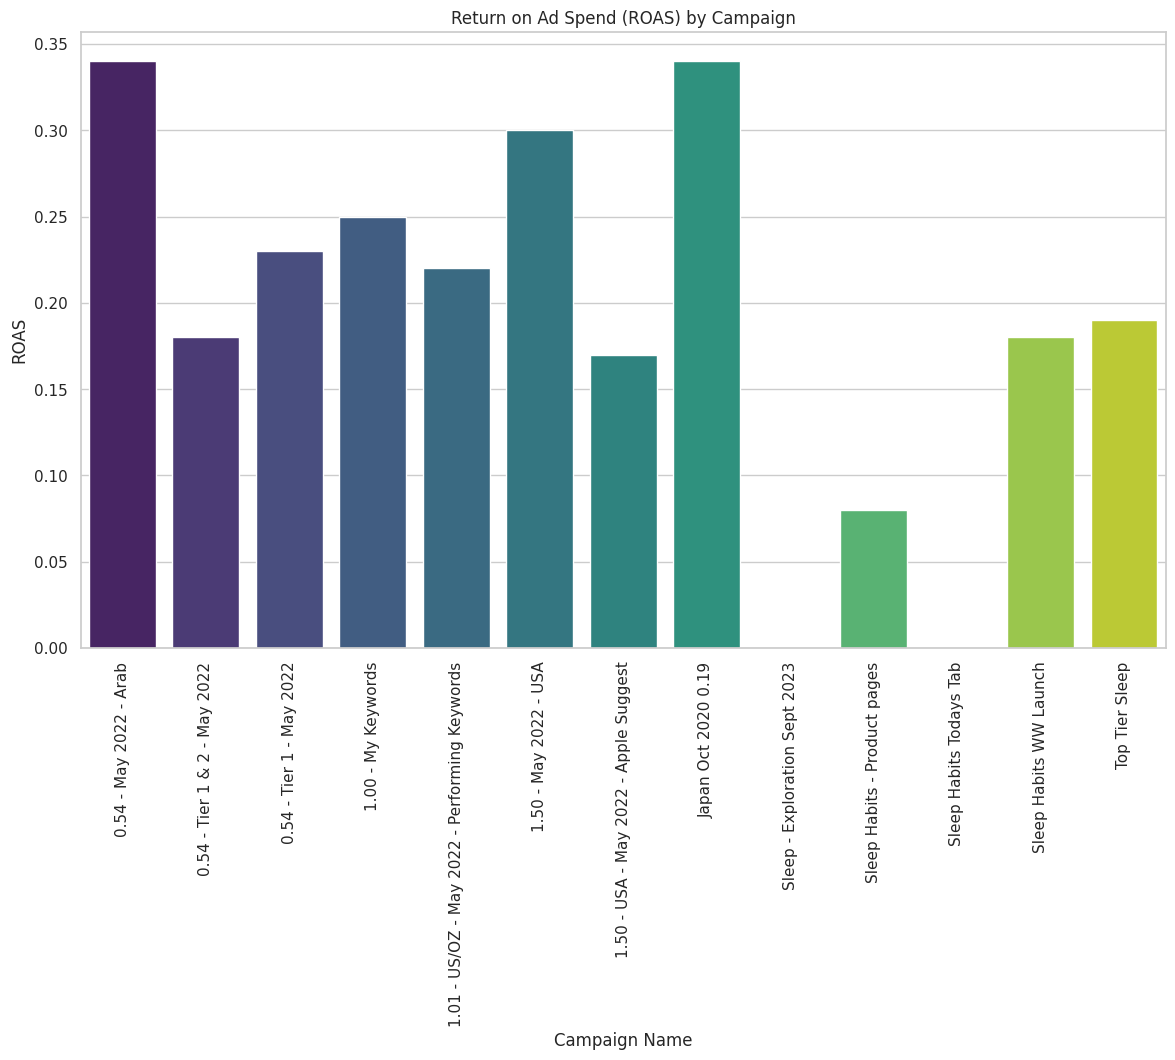

In [54]:
# Visualize Campaign Performance

import matplotlib.pyplot as plt
import seaborn as sns

# Plot campaign performance metrics
plt.figure(figsize=(14, 8))
sns.barplot(data=campaign_metrics, x='campaign_name', y='roas', palette='viridis')
plt.xticks(rotation=90)
plt.title('Return on Ad Spend (ROAS) by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROAS')
plt.show()


# Recommendations for a More Strategic Campaign Structure
Based on the analysis, these are specific recommendations to optimize your campaign structure

1. Segmentation by Product Category
- Create distinct ad groups within each campaign for different product categories or themes.
2. Refined Audience Targeting
- Use detailed user segmentation to tailor your audience targeting and improve ad relevance.
3. Optimized Bidding Strategies
- Implement data-driven bidding adjustments to maximize ROAS and minimize CPA.
4. Effective Budget Allocation
- Reallocate budget based on performance metrics to prioritize high-performing campaigns.
5. Automated Reporting
-  Set up automated reports and alerts to monitor performance and make data-driven decisions.